In [1]:
# Import bibliotecas
import os
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Função leitura dos dados
def read_wind_data(dir_name='Datathons_pem_vento'):
    """
    Função que faz leitura de todos os arquivos de dados de ventos e retorna um dataframe contendo todos os dados.
    Presume-se que os dados de vento são em intervalos de meia hora.
    A pasta precisa ter apenas arquivos de vento, formato txt.
    
    Args:
        dir_name (str, optional): string com o nome do diretório onde os dados estão
        
    Returns:
        df: pandas dataframe contendo as informações dos arquivos lidos.
            Cada coluna é uma usina e os index das linha são timestamps, ordenados.
    """
    path = os.path.join(os.getcwd(), dir_name)
    df = pd.DataFrame()
    for root, dirs, files in os.walk(path):
        for file in files:
            file_path = os.path.join(root, file)
            if file_path.endswith('txt'):
                df_temp = pd.read_csv(file_path, header=None, sep=';')
                df_temp[0] = pd.to_datetime(df_temp[0], format='%Y%m%d')
                df_temp.set_index(0, drop=True, inplace=True)
                init_date = df_temp.index[0]
                last_date = df_temp.index[-1] + timedelta(days=1) - timedelta(minutes=30)
                df_temp = df_temp.stack(dropna=False)
                df_temp.index = pd.date_range(init_date, last_date, freq='30T')
                df = pd.concat([df, pd.DataFrame(df_temp, columns=[file])], axis=1)
    df = df.reindex(sorted(df.columns), axis=1)
    return df

In [17]:
data = read_wind_data()
data

,U10_Ven_Prev.txt,U10_Ven_Verif.txt,U11_Ven_Prev.txt,U11_Ven_Verif.txt,U12_Ven_Prev.txt,U12_Ven_Verif.txt,U13_Ven_Prev.txt,U13_Ven_Verif.txt,U14_Ven_Prev.txt,U14_Ven_Verif.txt,...,U5_Ven_Prev.txt,U5_Ven_Verif.txt,U6_Ven_Prev.txt,U6_Ven_Verif.txt,U7_Ven_Prev.txt,U7_Ven_Verif.txt,U8_Ven_Prev.txt,U8_Ven_Verif.txt,U9_Ven_Prev.txt,U9_Ven_Verif.txt
2017-01-01 00:00:00,3.8796,3.2332,NaN,1.2080,NaN,1.1268,NaN,1.7056,NaN,1.9205,...,2.9649,3.0499,2.6004,4.4208,4.5385,3.7831,4.7348,3.2173,4.5700,3.2301
2017-01-01 00:30:00,3.8306,3.0635,NaN,1.0023,NaN,0.6833,NaN,1.8107,NaN,2.2813,...,2.9316,2.7315,2.5076,4.4953,4.5385,3.4434,4.5437,3.2036,4.5069,3.1167
2017-01-01 01:00:00,3.7815,2.7986,NaN,0.8058,NaN,0.7950,NaN,3.8786,NaN,2.7579,...,2.8983,2.4952,2.4147,3.8723,4.5385,3.7608,4.3527,3.3689,4.4439,2.7939
2017-01-01 01:30:00,3.7377,3.0123,NaN,1.0192,NaN,1.1210,NaN,3.7506,NaN,2.7623,...,2.9053,2.8445,2.3656,3.5962,4.4579,3.0795,4.1530,3.7987,4.3843,2.7652
2017-01-01 02:00:00,3.6939,2.9413,NaN,1.0742,NaN,1.0895,NaN,2.6184,NaN,2.3249,...,2.9123,2.9139,2.3166,3.5529,4.3773,2.7538,3.9532,3.9098,4.3247,2.8384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,3.1840,2.8725,2.0309,1.5289,1.0023,1.8960,1.6787,1.2904,1.7821,1.4464,...,2.4182,3.1559,3.1577,4.2607,2.9018,2.7038,3.1121,3.1995,4.2213,2.8216
2020-12-31 22:00:00,3.0701,2.3312,1.9381,1.1669,0.9252,1.6594,1.5701,0.8090,1.6682,1.2822,...,2.2570,3.0932,2.9965,3.9901,3.2137,2.7238,3.4275,3.2473,4.1320,2.6242
2020-12-31 22:30:00,3.0297,2.5118,1.6542,0.7361,0.9042,1.6658,1.4124,0.5454,1.3703,1.2373,...,2.0975,2.7557,2.6828,3.9751,3.3171,3.0499,3.6501,3.6175,3.8726,2.8661
2020-12-31 23:00:00,2.9894,2.9362,1.3703,0.9284,0.8832,1.5034,1.2547,0.9915,1.0724,1.2548,...,1.9381,2.9703,2.3691,3.9582,3.4205,3.1400,3.8726,3.4096,3.6133,3.3746


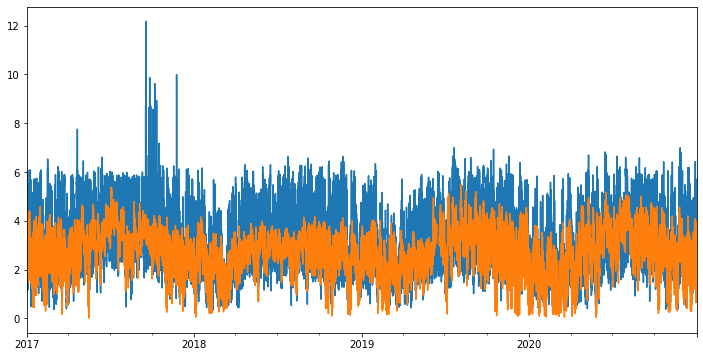

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
data.loc[:, 'U1_Ven_Verif.txt'].plot()
data.loc[:, 'U1_Ven_Prev.txt'].plot()
plt.show()